<a href="https://colab.research.google.com/github/DilshanManathunge/TensorflowPractice/blob/master/NLP/headline_Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-06-30 11:09:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-06-30 11:09:12 (50.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [4]:
with open("/tmp/sarcasm.json") as jsonfile:
  dataset = json.load(jsonfile)

In [6]:
sentences = []
labels = []

for item in dataset:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

In [7]:
print("there are {} numbner of sentences".format(len(sentences)))
print("there are {} numbner of labels".format(len(labels)))

there are 26709 numbner of sentences
there are 26709 numbner of labels


In [8]:
vocab_size = 1000
embedding_dims = 16
max_length = 100
trunc_type = "post"
padding_type = "post"
ovv_tokn = "<oov>"
training_size = 20000

In [10]:
training_sentences = sentences[0:training_size]
training_labels  = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]


In [15]:
print("there are {} numbner of Training sentences and {} number of  labels".format(len(training_sentences),len(training_labels)))
print("there are {} numbner of testing sentences and {} number of  labels".format(len(testing_sentences),len(testing_labels)))

there are 20000 numbner of Training sentences and 20000 number of  labels
there are 6709 numbner of testing sentences and 6709 number of  labels


In [17]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=ovv_tokn)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


In [22]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_training_sequences = pad_sequences(training_sequences,maxlen =max_length,padding=padding_type,truncating=trunc_type)

In [23]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
padded_testing_sequences = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [24]:
import numpy as np

padded_training_sequences = np.array(padded_training_sequences)
padded_testing_sequences = np.array(padded_testing_sequences)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [30]:
print(padded_training_sequences.shape)
print(padded_testing_sequences.shape)

(20000, 100)
(6709, 100)


In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D,Embedding

In [27]:
model = Sequential([
                    Embedding(vocab_size,embedding_dims,input_length=max_length),
                    GlobalAveragePooling1D(),
                    Dense(24,activation = "relu"),
                    Dense(1,activation= "sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer ="adam",metrics =['accuracy'])


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(padded_training_sequences,training_labels,epochs=30,validation_data=(padded_testing_sequences,testing_labels))

Epoch 1/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.8453 - val_loss: 0.4109 - val_accuracy: 0.8100
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8461 - val_loss: 0.4213 - val_accuracy: 0.8040
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8450 - val_loss: 0.4174 - val_accuracy: 0.8077
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8418 - val_loss: 0.4108 - val_accuracy: 0.8113
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8449 - val_loss: 0.4193 - val_accuracy: 0.8052
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8448 - val_loss: 0.4107 - val_accuracy: 0.8100
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8457 - val_loss: 0.4171 - val_accuracy: 0.8068
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

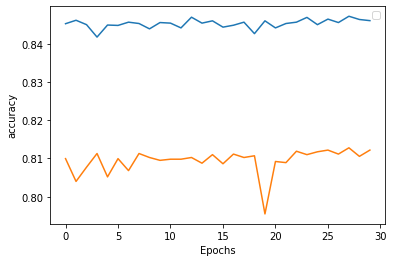

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

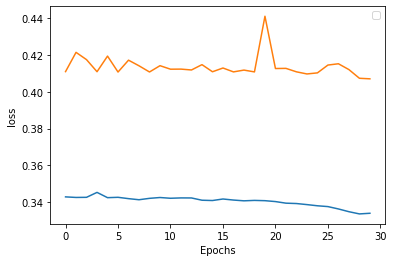

In [55]:
import matplotlib.pyplot as plt 

def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(string,"val_"+string)
  plt.show()

plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [41]:
zreverse_word_index = dict([(value,key) for (key,value) in word_index.items() ])

In [45]:
def decode_sentence(text):
  return ''.join([reverse_word_index.get(i,"?") for i in text])

In [49]:
print(decode_sentence(padded_training_sequences[0]))
print(training_sentences[2])
print(labels[2])

former<oov>store<oov><oov>oversecret<oov><oov>for<oov><oov>????????????????????????????????????????????????????????????????????????????????????????
mom starting to fear son's web series closest thing she will have to grandchild
1


In [50]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [57]:
sentence = ["City Enters Phase 4 Of Pretending dead  is Over"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.04027229]]
